In [1]:
import xarray as xr
import cftime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import logging
import cartopy.crs as ccrs
import metpy  # accessor needed to parse crs
import calendar
import argparse
import seaborn as sns
from shapely.geometry import Point
import geopandas
from geodatasets import get_path
import glob

In [2]:

tair = pd.read_csv('/home/smmrrr/TEM_Analysis/TEM_Analysis/test_parallel_run/model_merge_tair_all_info.csv'
                  )




In [16]:
tairyr = tair.drop(['month','Unnamed: 0'], axis = 1)

In [17]:
tairyr = tairyr.groupby(['lon', 'lat', 'Area', 'year']).mean()

In [18]:
tairyr.reset_index(inplace=True)
tairyr

,lon,lat,Area,year,MRIxxESM2xx0_ssp434_tair,MIROC6_ssp434_tair,CanESM5_ssp434_tair,CanESM5_ssp460_tair,MPIxxESM1xx2xxHR_ssp126_tair,MIROC6_ssp126_tair,...,MPIxxESM1xx2xxLR_ssp370_tair,BCCxxCSM2xxMR_ssp585_tair,MPIxxESM1xx2xxLR_ssp126_tair,MRIxxESM2xx0_ssp245_tair,MIROC6_ssp245_tair,MPIxxESM1xx2xxHR_ssp245_tair,MPIxxESM1xx2xxLR_ssp585_tair,BCCxxCSM2xxMR_ssp370_tair,BCCxxCSM2xxMR_ssp126_tair,AWIxxCMxx1xx1xxMR_ssp245_tair
0,-180.0,65.0,1040.0,2015,269.279648,267.407858,267.051435,267.742798,267.456006,267.905477,...,265.752408,265.795064,267.138058,268.570572,268.239963,269.334068,266.622703,264.768051,267.639304,271.288207
1,-180.0,65.0,1040.0,2016,268.633168,267.516375,268.141301,265.189079,269.351286,268.301223,...,266.752280,267.585046,268.463626,269.176978,268.157207,267.395271,265.784880,266.462491,266.124124,270.295686
2,-180.0,65.0,1040.0,2017,268.263884,270.142140,269.374531,265.747121,267.932840,268.394837,...,267.829656,268.881568,267.524371,268.403496,268.967634,269.686432,265.486988,267.065792,268.620367,269.241188
3,-180.0,65.0,1040.0,2018,269.230941,270.282547,267.279350,267.359382,268.741757,270.266212,...,268.313536,268.388822,267.352466,268.795123,269.722807,270.293653,267.540276,266.158097,267.491514,270.404268
4,-180.0,65.0,1040.0,2019,268.769710,271.340585,265.757709,269.469980,267.928763,271.416808,...,266.796503,267.046641,266.803392,269.822417,269.892050,267.669681,266.845349,266.951919,267.497611,269.795822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5384283,179.5,71.0,993.0,2096,268.932524,267.077445,268.917507,272.875745,262.968989,264.391428,...,268.945952,274.204923,263.820638,269.243626,270.648127,266.049133,270.648891,271.407833,264.888357,268.820378
5384284,179.5,71.0,993.0,2097,268.926967,268.027545,270.137880,273.359998,262.842839,267.055997,...,269.041007,270.418158,263.263839,269.250028,269.325007,266.333387,269.534650,272.180066,262.121866,268.005873
5384285,179.5,71.0,993.0,2098,266.517270,265.578494,268.941599,274.018126,263.882993,268.627531,...,268.355508,270.999910,263.309443,269.821908,268.688164,265.790334,269.981139,270.701350,264.298674,267.198996
5384286,179.5,71.0,993.0,2099,268.732717,266.874215,270.484307,272.299133,265.719416,267.081589,...,267.051672,272.712706,263.399856,268.204903,269.835245,266.992563,269.600116,270.644214,266.328135,268.022398


In [3]:
tair.columns

Index(['Unnamed: 0', 'lon', 'lat', 'Area', 'year', 'month',
       'MRIxxESM2xx0_ssp434_tair', 'MIROC6_ssp434_tair', 'CanESM5_ssp434_tair',
       'CanESM5_ssp460_tair', 'MPIxxESM1xx2xxHR_ssp126_tair',
       'MIROC6_ssp126_tair', 'MRIxxESM2xx0_ssp126_tair',
       'AWIxxCMxx1xx1xxMR_ssp370_tair', 'BCCxxCSM2xxMR_ssp245_tair',
       'AWIxxCMxx1xx1xxMR_ssp126_tair', 'MIROC6_ssp119_tair',
       'MRIxxESM2xx0_ssp370_tair', 'CanESM5_ssp585_tair',
       'MRIxxESM2xx0_ssp119_tair', 'MIROC6_ssp370_tair',
       'MPIxxESM1xx2xxHR_ssp370_tair', 'ACCESSxxCM2_ssp585_tair',
       'ACCESSxxCM2_ssp126_tair', 'MRIxxESM2xx0_ssp460_tair',
       'MIROC6_ssp460_tair', 'AWIxxCMxx1xx1xxMR_ssp585_tair',
       'MPIxxESM1xx2xxLR_ssp245_tair', 'MRIxxESM2xx0_ssp585_tair',
       'MIROC6_ssp585_tair', 'MPIxxESM1xx2xxHR_ssp585_tair',
       'ACCESSxxCM2_ssp370_tair', 'CanESM5_ssp245_tair',
       'ACCESSxxCM2_ssp245_tair', 'MPIxxESM1xx2xxLR_ssp370_tair',
       'BCCxxCSM2xxMR_ssp585_tair', 'MPIxxESM1xx2xxLR_

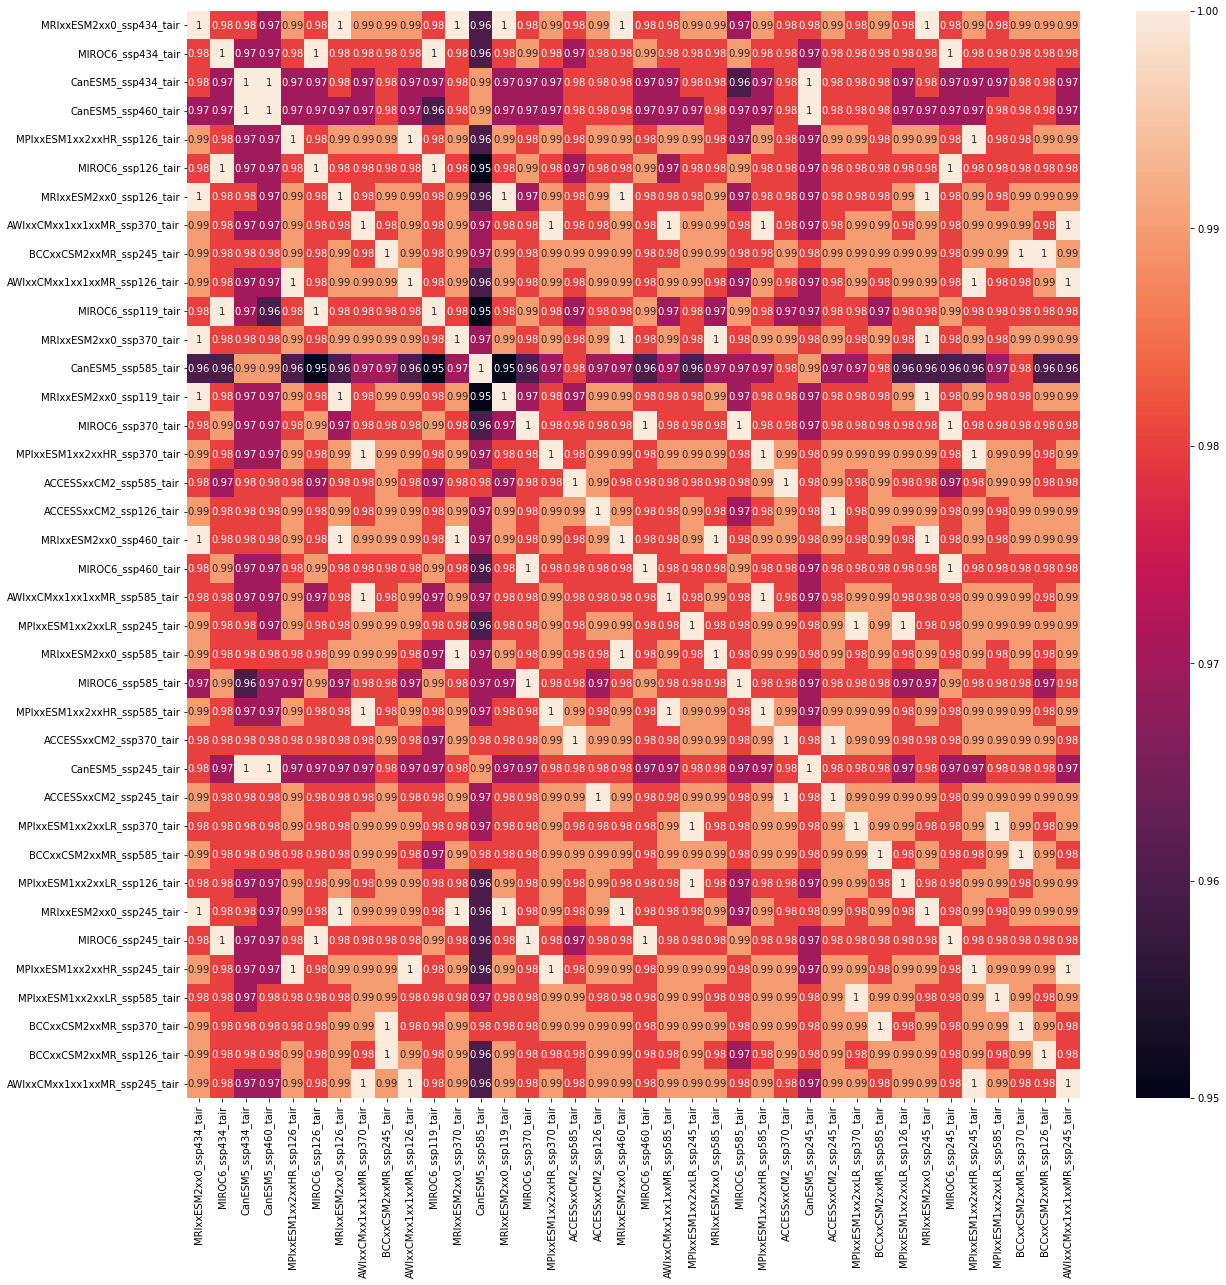

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


df = tairyr[['MRIxxESM2xx0_ssp434_tair', 'MIROC6_ssp434_tair', 'CanESM5_ssp434_tair',
       'CanESM5_ssp460_tair', 'MPIxxESM1xx2xxHR_ssp126_tair',
       'MIROC6_ssp126_tair', 'MRIxxESM2xx0_ssp126_tair',
       'AWIxxCMxx1xx1xxMR_ssp370_tair', 'BCCxxCSM2xxMR_ssp245_tair',
       'AWIxxCMxx1xx1xxMR_ssp126_tair', 'MIROC6_ssp119_tair',
       'MRIxxESM2xx0_ssp370_tair', 'CanESM5_ssp585_tair',
       'MRIxxESM2xx0_ssp119_tair', 'MIROC6_ssp370_tair',
       'MPIxxESM1xx2xxHR_ssp370_tair', 'ACCESSxxCM2_ssp585_tair',
       'ACCESSxxCM2_ssp126_tair', 'MRIxxESM2xx0_ssp460_tair',
       'MIROC6_ssp460_tair', 'AWIxxCMxx1xx1xxMR_ssp585_tair',
       'MPIxxESM1xx2xxLR_ssp245_tair', 'MRIxxESM2xx0_ssp585_tair',
       'MIROC6_ssp585_tair', 'MPIxxESM1xx2xxHR_ssp585_tair',
       'ACCESSxxCM2_ssp370_tair', 'CanESM5_ssp245_tair',
       'ACCESSxxCM2_ssp245_tair', 'MPIxxESM1xx2xxLR_ssp370_tair',
       'BCCxxCSM2xxMR_ssp585_tair', 'MPIxxESM1xx2xxLR_ssp126_tair',
       'MRIxxESM2xx0_ssp245_tair', 'MIROC6_ssp245_tair',
       'MPIxxESM1xx2xxHR_ssp245_tair', 'MPIxxESM1xx2xxLR_ssp585_tair',
       'BCCxxCSM2xxMR_ssp370_tair', 'BCCxxCSM2xxMR_ssp126_tair',
       'AWIxxCMxx1xx1xxMR_ssp245_tair']]

# df = df.dropna()
matrix = df.corr().round(2)
plt.figure(figsize=(20, 20))
sns.heatmap(matrix, annot=True)
plt.show()


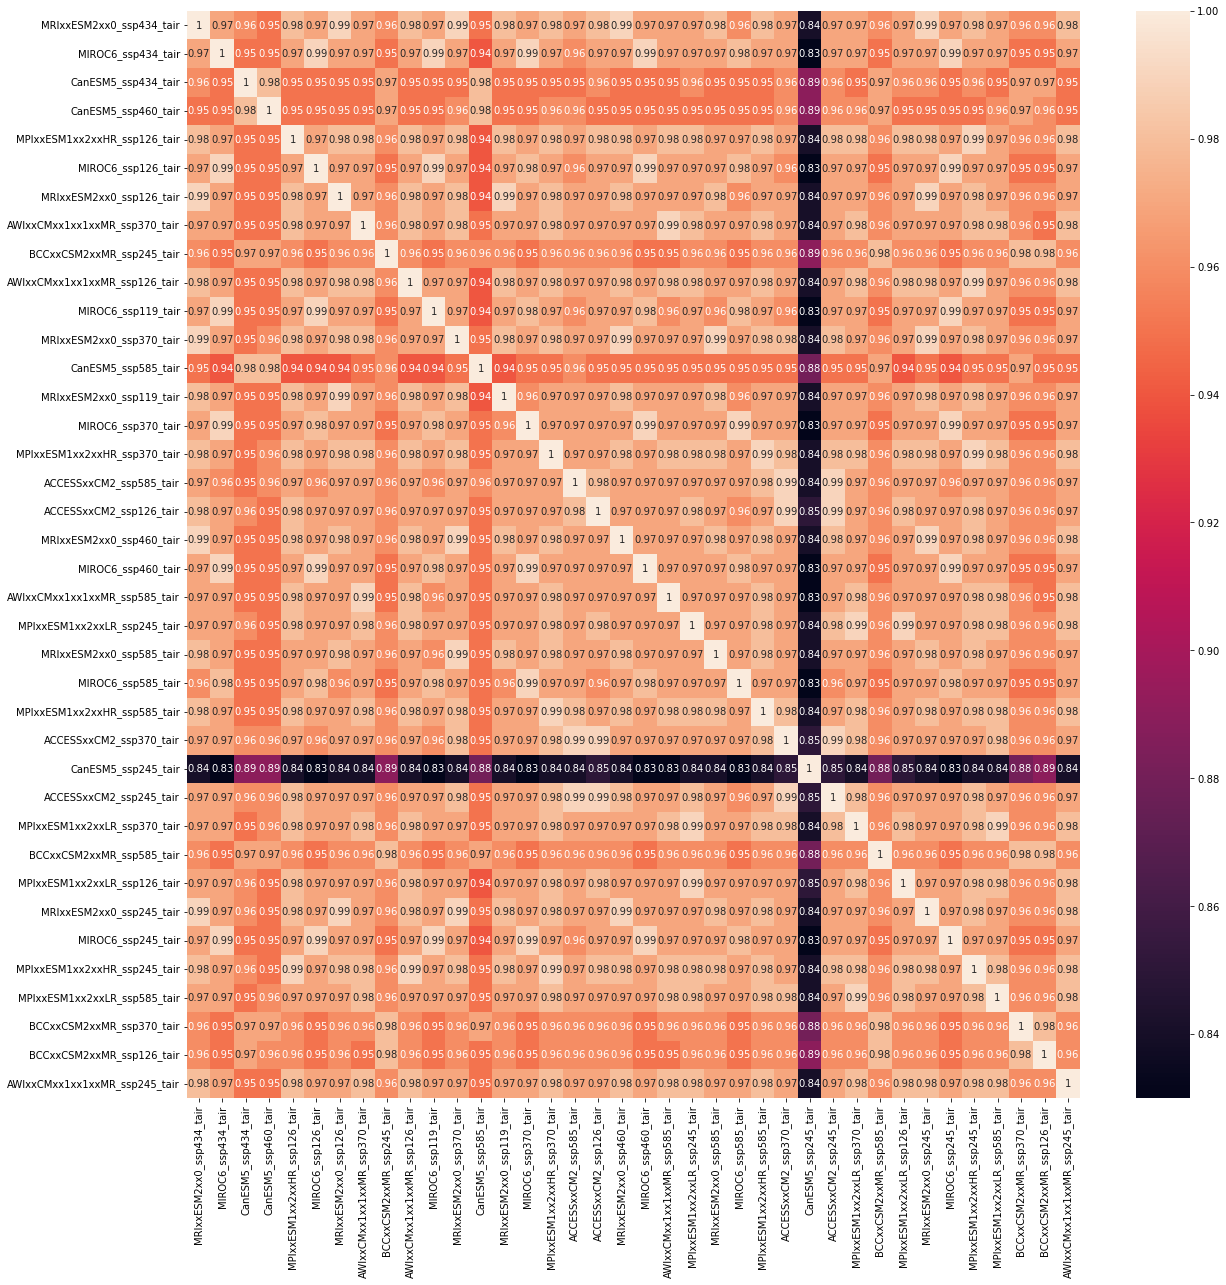

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


df = tair[['MRIxxESM2xx0_ssp434_tair', 'MIROC6_ssp434_tair', 'CanESM5_ssp434_tair',
       'CanESM5_ssp460_tair', 'MPIxxESM1xx2xxHR_ssp126_tair',
       'MIROC6_ssp126_tair', 'MRIxxESM2xx0_ssp126_tair',
       'AWIxxCMxx1xx1xxMR_ssp370_tair', 'BCCxxCSM2xxMR_ssp245_tair',
       'AWIxxCMxx1xx1xxMR_ssp126_tair', 'MIROC6_ssp119_tair',
       'MRIxxESM2xx0_ssp370_tair', 'CanESM5_ssp585_tair',
       'MRIxxESM2xx0_ssp119_tair', 'MIROC6_ssp370_tair',
       'MPIxxESM1xx2xxHR_ssp370_tair', 'ACCESSxxCM2_ssp585_tair',
       'ACCESSxxCM2_ssp126_tair', 'MRIxxESM2xx0_ssp460_tair',
       'MIROC6_ssp460_tair', 'AWIxxCMxx1xx1xxMR_ssp585_tair',
       'MPIxxESM1xx2xxLR_ssp245_tair', 'MRIxxESM2xx0_ssp585_tair',
       'MIROC6_ssp585_tair', 'MPIxxESM1xx2xxHR_ssp585_tair',
       'ACCESSxxCM2_ssp370_tair', 'CanESM5_ssp245_tair',
       'ACCESSxxCM2_ssp245_tair', 'MPIxxESM1xx2xxLR_ssp370_tair',
       'BCCxxCSM2xxMR_ssp585_tair', 'MPIxxESM1xx2xxLR_ssp126_tair',
       'MRIxxESM2xx0_ssp245_tair', 'MIROC6_ssp245_tair',
       'MPIxxESM1xx2xxHR_ssp245_tair', 'MPIxxESM1xx2xxLR_ssp585_tair',
       'BCCxxCSM2xxMR_ssp370_tair', 'BCCxxCSM2xxMR_ssp126_tair',
       'AWIxxCMxx1xx1xxMR_ssp245_tair']]

# df = df.dropna()
matrix = df.corr().round(2)
plt.figure(figsize=(20, 20))
sns.heatmap(matrix, annot=True)
plt.show()
